# Imports

In [1]:
import numpy as np
import websocket
import talib
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Setting parameters

In [2]:
# Data gathering
closing_price = list()
date = list()


# Functions for socket-------------------------------
def on_open(ws):
    print('A connection has been opened')
    
def on_close(ws):
    print('The connection has been closed')
    
def on_message(ws, message):
    print('A message has been received')
    
    # Load it as a dict type 
    json_message = json.loads(message)
    
    # Dont need the first key 
    simple_data = json_message['k']
    
    # Append the message
    closing_price.append(simple_data['c'])
    date.append(datetime.now())
    
    
    
def on_error(ws, error):
    print(error)
    
# Defining socket-------------------------------------------
SOCKET = "wss://stream.binance.com:9443/ws/ethusdt@kline_1m"

# Connecting to Binance

## Websocket access 

In [3]:
ws = websocket.WebSocketApp(SOCKET, on_open=on_open, on_close = on_close, on_message = on_message, on_error = on_error)
ws.run_forever()

A connection has been opened
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been 

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been received
A message has been r

False

# DataFrame exploration 

### 1. Storing the Excel file

In [4]:
# Making index as correct date 
def list_to_datetime(dates_list):
    dates = list()
    
    for i in dates_list:
        # Correct time
        dt_string = i.strftime("%d/%m/%Y %H:%M:%S")
        # To Pandas
        datetime_pd = pd.to_datetime(dt_string)
        
        # Append
        dates.append(datetime_pd)
      
    pd_dates = pd.Series(dates)
    return pd_dates

In [5]:
# Dates as Pandas series to use for DataFrame
pd_date_index = list_to_datetime(date)

# Creating the DataFrame
df = pd.DataFrame(data = closing_price, index = pd_date_index, columns = ['Closing price'])

In [6]:
# Inspecting
df.head()

# Saving the file 
df.to_excel("data.xlsx")

### 2. Loading the Excel file and preparing for analysis

In [7]:
# Data in data 
df = pd.read_excel('data.xlsx', index_col = 0)

In [8]:
# Inspect
display(df.head())

display(df.info())

,Closing price
2021-09-07 07:47:41,2141.55
2021-09-07 07:47:43,2141.37
2021-09-07 07:47:45,2141.57
2021-09-07 07:47:48,2141.78
2021-09-07 07:47:50,2141.39


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7205 entries, 2021-09-07 07:47:41 to 2021-09-07 12:15:33
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing price  7205 non-null   float64
dtypes: float64(1)
memory usage: 112.6 KB


None

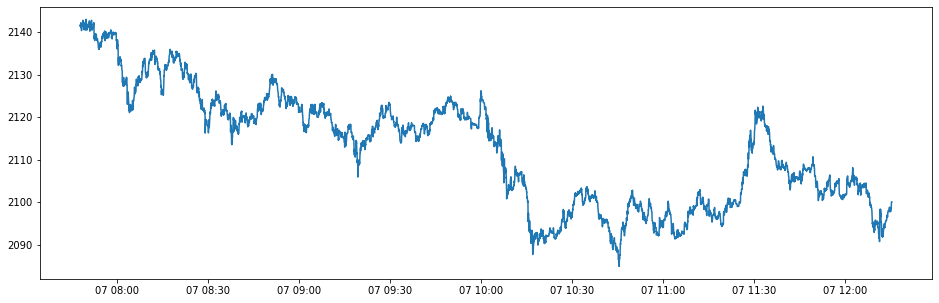

In [14]:
# Plot
plt.figure(figsize=(16,5))
plt.plot(df['Closing price'])

# Executing trade

### Loading in bot

# CREATING THE B0T

In [27]:
import os
#os.chdir('data')
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

# Plotting
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Network
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

# DataAnalysis class. 
# For time series: x is dates, and y is the target column. Ensure that the date is properly set up in a datetime format
class DataAnalysis:
    '''
    The DataAnalysis class is used for objectives such as: 'Time Series', 'Classification' and 'Regression.' 
    '''
    
    def __init__(self, objective, df, y):
        
        '''
        To instantizate the class to an object, the objective must be defined, the dataframe must be loaded, and X and y 
        must be assigned. The info of the dataframe and a graph of the y variable against the index will be plotted.
        '''
        
        # Define objective 
        self.objective = objective
        print('The objective of the analysis is: ', objective)
        print('------------------------------------------------------------------------------')
        
        
        
        if self.objective.lower() == 'time series':
            print('The workflow for Time Series is following:\n')
            
            print('Step 0: Set variables.')
            print('Consider whether to train on entire dataset or subset')
            print('Consider the dates to test\n')
            
            print('Step 1: Check that the data is clean.')
            print('1.1. Look at the chart, are there big holes?')
            print('1.2. Use the function: DataAnalysis.identify_clean_time_series()')
            print('1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()')
            print('1.4. If the data is still not clean, this should be handled manually\n')
            
            print('Step 2: EDA')
            print('Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()')
            print('2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()')
            print('2.3. Plot ACF and PACF through statsmodels\n')
            
            print('Step 3: Forecasting')
            print('Step 3.1. Create model')
            print('Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()')
            print('Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()')
            print('Step 3.1.3. Create model with DataAnalysis.make_network_for_timeseries()\n')
            
            print('Step 3.2. Predict')
            print('Step 3.2.1. Run DataAnalysis.predict_time_series()\n')
            
            print('Step 3.3. Plot')
            print('Step 3.3.1. Run DataAnalysis.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates\n)')
        
            print('------------------------------------------------------------------------------')
            
        
            # Assign dataframe 
            if isinstance(df, pd.DataFrame):
                self.df = df
                print('This is the DataFrame to be analyzed: ')
                display(df.head())
            elif isinstance(df, str):
                self.df = pd.read_csv(df) 
                print('The DataFrame to be analyzed is: ', df)
            else:
                print('Error, not appropriate input. Input should either be Pandas Dataframe or name of file')

            print('------------------------------------------------------------------------------')

            # Define x and y 
            #self.x = self.df[x]
            self.y = self.df[y]

            # Info
            print('This is the info of the dataframe \n')
            print(self.df.info(), '\n');
            print('------------------------------------------------------------------------------')


            # Plot y against index
            print('This is the plot of the Y variable with the index\n')
            plt.rcParams["figure.figsize"] = (20,3)
            self.y.plot()
            plt.show()

            # Time series components
            if self.objective == 'Time Series':
                print('Remember to consider: ')
                print('Does the series contain trend, seasonality or clear noise?')
                print('Does the series seem additivie, multiplicative or psuedo-additive?')
                print('Is the series stationary? Consider constant mean, constant variance, constant autocorrelation and periodic components')
        
        
    # Decomposing time series into trend, seasonality and residual 
    def decompose_time_series(self, decompose_series):
        '''
        The only argument needed is the series to be decomposed 
        '''
        self.decompose_series = decompose_series
        
        # Decompose
        ss_decomposition = seasonal_decompose(x=self.decompose_series)
        estimated_trend = ss_decomposition.trend
        estimated_seasonal = ss_decomposition.seasonal
        estimated_residual = ss_decomposition.resid

        # Plot
        plt.plot(estimated_trend)
        plt.title('Estimated trend')
        plt.show()
        plt.plot(estimated_seasonal, label = 'Estimated ')
        plt.title('Estimated seasonality')
        plt.show()
        plt.plot(estimated_residual)
        plt.title('Estimated residual')
        plt.show()
    
    # Identify whether the time series is clean
    def identify_clean_time_series(self, x, y):
        '''
        The time series is deemed clean if there are no null values.
        '''
        if self.df[y].isnull().sum() > 0:
            print('Y variable needs to be cleaned. It contains NaN values')
            print('The number of NaN values is: ', self.df[y].isnull().sum())
            print('--------------------------------------------------------')
        else:
            print('Y variable is clean')
    
    
    # Clean time series by interpolating 
    def clean_time_series_interpolate(self, y):
        '''
        The time series column will be interpolated, but if there are more missing values, it needs to be done manually.
        In the future, if certain usual problems occur, these should be incorporated.
        '''
        if self.df[y].isnull().sum() > 0:
            self.df[y] = self.df[y].interpolate()
            print('The data has been interpolated. Number of NaN values is: ', self.df[y].isnull().sum())
            
            if self.df[y].isnull().sum() > 0:
                print('It is still not clean, this needs special help. The number of NaN values is: ', 
                      self.df[y].isnull().sum())
            else:
                print('This series is clean')
        else:
            print('This series is clean')
            
    # Stationarity 
    def check_stationarity(self, df):
        '''
        Stationarity is important for certain time series models. Deep learning models can usually handle
        non-stationary data, however.
        '''
        print('The series can be assesed to be stationary with the help of histogram and Dickey-Fuller test')
        df.hist()
        plt.title('Distribution of data')
        plt.show()
        
        self.adf, self.pvalue, self.usedlag, self.nobs, self.critical_values, self.icbest = adfuller(df)
        print('The Dickey-Fuller test for stationarity reveals the following: ')
        print(f'ADF test value: {round(self.adf,2)} | P-value {self.pvalue}')
        
        print('----------------------------------------------------------------------')
        print('If stationarity is tested at a p-value of 0.05, ')
        if self.pvalue < 0.05:
            print('the series is stationary')
        elif self.pvalue > 0.05:
            print('the series is non-stationary')
        else:
            print('Something went wrong')
            
            
    # Get first dates for a time series.
    def get_first_dates(self, df, column, n_units):
        return self.df[column][:-n_units]
    
    # Plot the first dates 
    def plot_first_dates(self, df, column, n_units):
        print(f'This is the dates without the last {n_units} dates of {column}')
        self.get_first_dates(df, column,n_units).plot()
        plt.title(f'{column}')
        
    # Get last dates, useful for big datasets     
    def get_last_dates(self, df, column, n_units):
        return self.df[column][-n_units:]
    
    # Plotting last dates, always important to inspect the data 
    def plot_last_dates(self, df, column, n_units):
        print(f'This is the last {n_units} dates of {column}')
        self.get_last_dates(df, column,n_units).plot()
        plt.title(f'{column}')
    
    #HERE
    # TRAIN TEST SPLITTING 
    def train_test_split_time_series(self, df, y, test_dates, subset = False, subset_start = 0):
        
        '''
        The dataset is split into a train and test set. Subset can be set to True and a subset start can be specified
        for larger datasets. 
        '''
    
        # Split into first and last dates depeding on specified test_dates
        self.train = self.get_first_dates(self.df, y, test_dates)
        self.test = self.get_last_dates(self.df, y, test_dates)
        
        # Able to decrease size of data
        if subset == True:
            self.train = self.train[subset_start:]
        else:
            pass 
        
        print('The shape of the train set is: ', self.train.shape)
        print('The shape of the test set is: ', self.test.shape)
        
        #Return train and test
        return self.train, self.test
    
    # Splitting train and test into X and y
    def X_y_split_time_series(self, train, test, len_of_sequence, features = 1):
        self.train_X = []
        self.train_y = []
        
        for i in range(0, train.shape[0]-len_of_sequence):
            self.train_X.append(train[i:i+len_of_sequence])
            self.train_y.append(train[i+len_of_sequence])
        
        # Train X
        self.train_X = np.array(self.train_X)
        self.train_X = self.train_X.reshape(self.train_X.shape[0],self.train_X.shape[1],features)
        
        # Train y
        self.train_y = np.array(self.train_y)
        
        # Tests
        self.test_X = np.array(test[:len_of_sequence])
        self.test_y = np.array(test[len_of_sequence:])
        
        # Info
        print('The shape of train_X is: ', self.train_X.shape)
        print('The shape of train_y is: ', self.train_y.shape)
        print('The shape of test_X is: ', self.test_X.shape)
        print('The shape of test_y is: ', self.test_y.shape)
        
        
        return self.train_X, self.train_y, self.test_X, self.test_y
        
        
    # TIMESERIES------------------------------------------------------------------------------------------------------
    # CREATING THE NETWORK, timeseries 
    def make_network_for_timeseries(self, train_X, train_y, n_cells, epochs, cell1 = SimpleRNN, features = 1, 
                                    batch_size = 64, verbose = 2,
                                    loss='mean_squared_error', optimizer = 'adam'):
        
        # Initialize network object
        self.network = Sequential()
        
        # Make first hidden state
        self.network.add(cell1(n_cells, input_shape = (train_X.shape[1], features)))
        
        # Add output layer
        self.network.add(Dense(1))
        
        # Compile and fit
        self.network.compile(loss=loss, optimizer=optimizer)
        self.network.fit(train_X, train_y, epochs = epochs, batch_size = batch_size, verbose = verbose)
        
        return self.network
    
    # PREDICTING, time series 
    def predict_time_series(self, network, test_X, test_y):
        self.test_X_copy = test_X.copy().reshape(1,-1,1)
        self.y_pred = []
        
        # Make predictions
        for _ in range(len(test_y)):
            self.pred = network.predict(self.test_X_copy)
            self.y_pred.append(self.pred)
            
            # Include new predictions as the last value and remove the first (for future, could make deque)
            self.test_X_copy[:, :-1, :] = self.test_X_copy[:, 1:, :]
            self.test_X_copy[:, -1, :] = self.pred 
        
        self.preds = np.array(self.y_pred).reshape(-1,1)
            
        return self.preds 
    
    
    # PLOTTING PREDICTIONS, time series 
    def plot_time_series_predictions(self, test_X, test_y, y_preds, test_dates):
        # Range
        start_range = range(1, test_X.shape[0]+1)
        predict_range = range(test_X.shape[0], test_dates)
        
        # Plotting
        plt.plot(start_range, test_X)
        plt.plot(predict_range, test_y, color = 'orange')
        plt.plot(predict_range, y_preds, color = 'teal', linestyle = '--')
        
        # Title and legend
        plt.title('Test data and predictions')
        plt.legend(['Initial Series','Target Series','Predictions'])
 

In [16]:
# Variables
df = pd.read_excel('data.xlsx', index_col = 0)
X = 0
y = 'Closing price'

The objective of the analysis is:  Time series
------------------------------------------------------------------------------
The workflow for Time Series is following:

Step 0: Set variables.
Consider whether to train on entire dataset or subset
Consider the dates to test

Step 1: Check that the data is clean.
1.1. Look at the chart, are there big holes?
1.2. Use the function: DataAnalysis.identify_clean_time_series()
1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()
1.4. If the data is still not clean, this should be handled manually

Step 2: EDA
Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()
2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()
2.3. Plot ACF and PACF through statsmodels

Step 3: Forecasting
Step 3.1. Create model
Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()
Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()
Step 3.1.3. 

,Closing price
2021-09-07 07:47:41,2141.55
2021-09-07 07:47:43,2141.37
2021-09-07 07:47:45,2141.57
2021-09-07 07:47:48,2141.78
2021-09-07 07:47:50,2141.39


------------------------------------------------------------------------------
This is the info of the dataframe 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7205 entries, 2021-09-07 07:47:41 to 2021-09-07 12:15:33
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing price  7205 non-null   float64
dtypes: float64(1)
memory usage: 112.6 KB
None 

------------------------------------------------------------------------------
This is the plot of the Y variable with the index



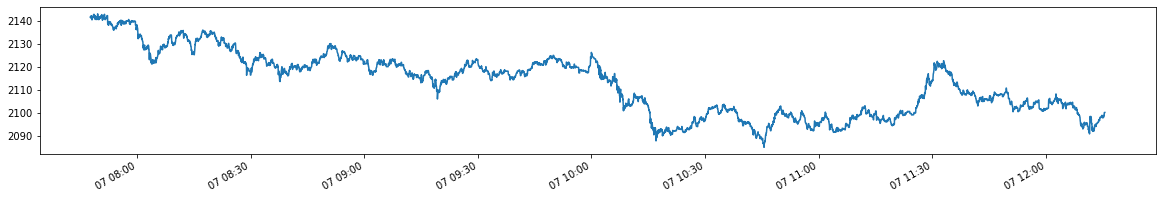

In [17]:
model = DataAnalysis('Time series', df, y)

In [18]:
# Clean
# Check clean
print(model.df.isna().sum())
print('')

# Check if needs to be cleaned
model.identify_clean_time_series(0,y)

# Clean
model.clean_time_series_interpolate(y)

Closing price    0
dtype: int64

Y variable is clean
This series is clean


This is the last 24 dates of Closing price


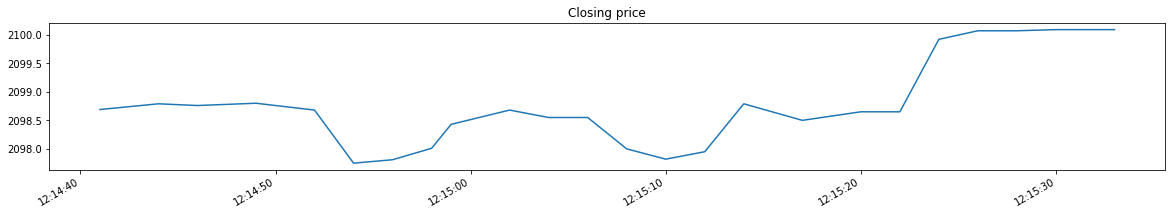

In [19]:
# EDA
# Lets take a look at the last year 
model.get_last_dates(df, y, 24)
model.plot_last_dates(df, y, 24)

This is the dates without the last 12 dates of Closing price


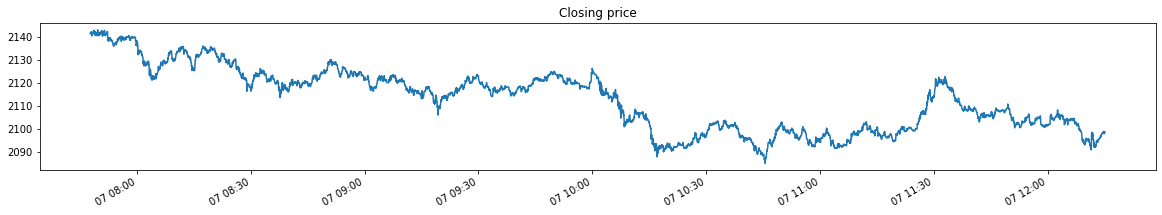

In [20]:
# And the first years
model.get_first_dates(df, y, 12)
model.plot_first_dates(df, y, 12)

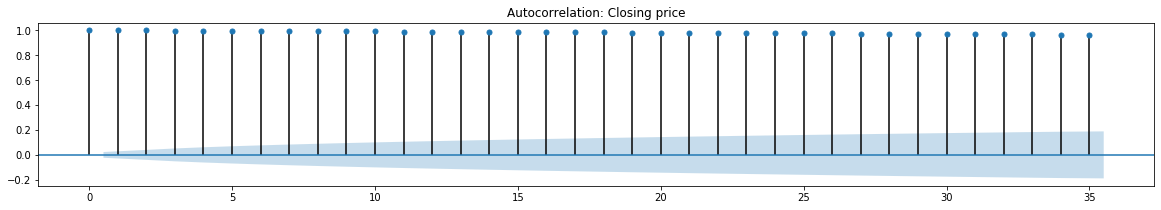

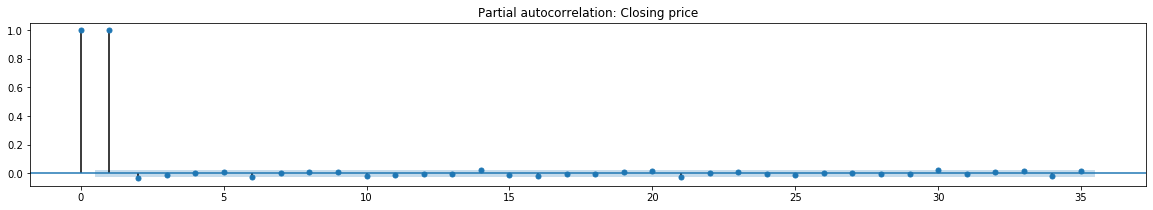

In [21]:
# ACF
plot_acf(model.df[y], title = f'Autocorrelation: {y}', lags = 35);

# PACF 
plot_pacf(model.df[y], title = f'Partial autocorrelation: {y}', lags = 35);

In [22]:
# Interested in testing last 24 days 
test_dates = 24

# Length of sequence (for the current dataset, it would be interesting to forecast a year in advance)
len_of_sequence = 12

# Train
train, test = model.train_test_split_time_series(df, y, test_dates, subset = True, subset_start = 0)

The shape of the train set is:  (7181,)
The shape of the test set is:  (24,)


In [30]:
train

2021-09-07 07:47:41.000000    2141.55
2021-09-07 07:47:43.000000    2141.37
2021-09-07 07:47:45.000000    2141.57
2021-09-07 07:47:48.000000    2141.78
2021-09-07 07:47:50.000000    2141.39
                               ...   
2021-09-07 12:14:30.000000    2098.01
2021-09-07 12:14:32.000000    2098.00
2021-09-07 12:14:35.000000    2098.23
2021-09-07 12:14:36.999999    2098.40
2021-09-07 12:14:39.000000    2098.66
Name: Closing price, Length: 7181, dtype: float64

In [36]:
# MinMax scaler 
MMscaler = MinMaxScaler()
train = MMscaler.fit_transform(train.values.reshape(-1,1))

In [44]:
# X and y split 
train_X, train_y, test_X, test_y = model.X_y_split_time_series(train, test, len_of_sequence, features = 1)

The shape of train_X is:  (7169, 12, 1)
The shape of train_y is:  (7169, 1)
The shape of test_X is:  (12,)
The shape of test_y is:  (12,)


In [43]:
train_X

array([[[0.97503444],
        [0.97193526],
        [0.97537879],
        ...,
        [0.96556474],
        [0.97348485],
        [0.96780303]],

       [[0.97193526],
        [0.97537879],
        [0.97899449],
        ...,
        [0.97348485],
        [0.96780303],
        [0.97038567]],

       [[0.97537879],
        [0.97899449],
        [0.97227961],
        ...,
        [0.96780303],
        [0.97038567],
        [0.95454545]],

       ...,

       [[0.19972452],
        [0.20196281],
        [0.20213499],
        ...,
        [0.22537879],
        [0.22537879],
        [0.22520661]],

       [[0.20196281],
        [0.20213499],
        [0.21763085],
        ...,
        [0.22537879],
        [0.22520661],
        [0.22916667]],

       [[0.20213499],
        [0.21763085],
        [0.21745868],
        ...,
        [0.22520661],
        [0.22916667],
        [0.23209366]]])

In [45]:
# Defining function to evaluate model 
def calc_MSE(test_y, y_preds):
    assert test_y.shape == y_preds.shape
    error = (test_y - y_preds).sum()
    sq_error = error**2
    mse = sq_error / len(test_y)
    
    return mse 

Following combination is finished: 
Cell units = 200 | epochs = 600
Epoch 1/600
 - 3s - loss: 0.0088
Epoch 2/600
 - 3s - loss: 2.4782e-04
Epoch 3/600
 - 3s - loss: 2.4318e-04
Epoch 4/600
 - 3s - loss: 2.3572e-04
Epoch 5/600
 - 3s - loss: 2.5656e-04
Epoch 6/600
 - 3s - loss: 2.2311e-04
Epoch 7/600
 - 3s - loss: 2.2357e-04
Epoch 8/600
 - 3s - loss: 2.1848e-04
Epoch 9/600
 - 3s - loss: 2.2440e-04
Epoch 10/600
 - 3s - loss: 2.5461e-04
Epoch 11/600
 - 3s - loss: 2.0108e-04
Epoch 12/600
 - 3s - loss: 1.9520e-04
Epoch 13/600
 - 3s - loss: 1.8879e-04
Epoch 14/600
 - 3s - loss: 1.8467e-04
Epoch 15/600
 - 3s - loss: 2.5802e-04
Epoch 16/600
 - 3s - loss: 1.8156e-04
Epoch 17/600
 - 3s - loss: 2.0127e-04
Epoch 18/600
 - 3s - loss: 1.7381e-04
Epoch 19/600
 - 3s - loss: 1.6281e-04
Epoch 20/600
 - 3s - loss: 1.5770e-04
Epoch 21/600
 - 3s - loss: 1.5487e-04
Epoch 22/600
 - 3s - loss: 1.5305e-04
Epoch 23/600
 - 3s - loss: 1.4825e-04
Epoch 24/600
 - 3s - loss: 1.5153e-04
Epoch 25/600
 - 3s - loss: 1.3916

 - 3s - loss: 6.4772e-05
Epoch 213/600
 - 3s - loss: 6.7915e-05
Epoch 214/600
 - 3s - loss: 6.6101e-05
Epoch 215/600
 - 3s - loss: 6.9054e-05
Epoch 216/600
 - 3s - loss: 6.9488e-05
Epoch 217/600
 - 3s - loss: 7.1227e-05
Epoch 218/600
 - 3s - loss: 6.5064e-05
Epoch 219/600
 - 3s - loss: 6.6614e-05
Epoch 220/600
 - 3s - loss: 6.8519e-05
Epoch 221/600
 - 3s - loss: 6.6640e-05
Epoch 222/600
 - 3s - loss: 6.7975e-05
Epoch 223/600
 - 3s - loss: 6.5871e-05
Epoch 224/600
 - 3s - loss: 6.5614e-05
Epoch 225/600
 - 3s - loss: 6.5351e-05
Epoch 226/600
 - 3s - loss: 6.7134e-05
Epoch 227/600
 - 3s - loss: 6.7139e-05
Epoch 228/600
 - 3s - loss: 6.6452e-05
Epoch 229/600
 - 3s - loss: 6.5839e-05
Epoch 230/600
 - 3s - loss: 6.5266e-05
Epoch 231/600
 - 3s - loss: 6.8379e-05
Epoch 232/600
 - 3s - loss: 6.9618e-05
Epoch 233/600
 - 3s - loss: 6.6402e-05
Epoch 234/600
 - 3s - loss: 6.7680e-05
Epoch 235/600
 - 3s - loss: 6.5905e-05
Epoch 236/600
 - 3s - loss: 6.5742e-05
Epoch 237/600
 - 3s - loss: 6.6627e-05


Epoch 423/600
 - 3s - loss: 6.9606e-05
Epoch 424/600
 - 3s - loss: 6.4942e-05
Epoch 425/600
 - 3s - loss: 6.4621e-05
Epoch 426/600
 - 3s - loss: 6.5690e-05
Epoch 427/600
 - 3s - loss: 6.6669e-05
Epoch 428/600
 - 3s - loss: 6.5857e-05
Epoch 429/600
 - 3s - loss: 6.5214e-05
Epoch 430/600
 - 3s - loss: 6.5516e-05
Epoch 431/600
 - 3s - loss: 6.5895e-05
Epoch 432/600
 - 3s - loss: 6.6546e-05
Epoch 433/600
 - 3s - loss: 6.6699e-05
Epoch 434/600
 - 3s - loss: 8.0115e-05
Epoch 435/600
 - 3s - loss: 6.4996e-05
Epoch 436/600
 - 3s - loss: 6.4880e-05
Epoch 437/600
 - 3s - loss: 6.4979e-05
Epoch 438/600
 - 3s - loss: 6.6766e-05
Epoch 439/600
 - 3s - loss: 6.7019e-05
Epoch 440/600
 - 3s - loss: 7.6316e-05
Epoch 441/600
 - 3s - loss: 6.4974e-05
Epoch 442/600
 - 3s - loss: 6.6316e-05
Epoch 443/600
 - 3s - loss: 6.5672e-05
Epoch 444/600
 - 3s - loss: 6.4555e-05
Epoch 445/600
 - 3s - loss: 6.5192e-05
Epoch 446/600
 - 3s - loss: 7.0204e-05
Epoch 447/600
 - 3s - loss: 6.6855e-05
Epoch 448/600
 - 3s - los

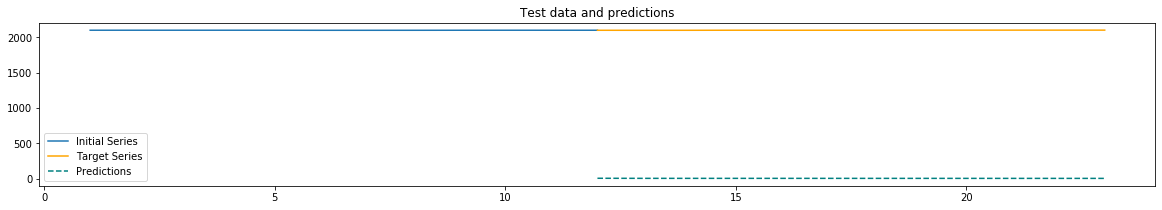

In [46]:
epoch_list = [600]
cell_units = [200]

for i in epoch_list:
    for j in cell_units:
        print('Following combination is finished: ')
        print(f'Cell units = {j} | epochs = {i}')
        
        # Create model
        network = model.make_network_for_timeseries(train_X, train_y, cell1 = LSTM, n_cells=j, epochs=i, features = 1, 
                                    batch_size = 64, verbose = 2,
                                    loss='mean_squared_error', optimizer = 'adam')
        # Predict
        y_preds = model.predict_time_series(network, test_X, test_y)
        
        # Performance 
        MSE = calc_MSE(test_y, y_preds.reshape(12))
        print('Mean Squared Error for this combination is : ', round(MSE, 2))
        
        # Plotting
        model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates)
        
        plt.show() 